# Jupyter Notebook Slides Demo
## _How and why to put your Jupyter Notebooks into Docker containers_
---

### Brian Austin   
Data Scientist   

![](https://mma.prnewswire.com/media/819833/U_Group_Logo.jpg) 

## What are Jupyter Notebooks?

## Key Uses
- Designing, developing and testing solutions to problems using REPR capabilities

In [1]:
# how do I combine lists of dictionaries again?
d_a = [{'some':24,'stuff':14},{'other':68, 'things':84}]
d_b = [{'entirely':18,'added':77},{'more':66,'keys':27}]
all_dicts = list(map(lambda a,b: dict(a, **b), d_a, d_b))
all_dicts

[{'some': 24, 'stuff': 14, 'entirely': 18, 'added': 77},
 {'other': 68, 'things': 84, 'more': 66, 'keys': 27}]

## Key Uses
- Presenting analyses I've completed, demonstrating _both_ the code and output for them in tidy concise cells like **this** one you're reading right here currently on this slide right now.

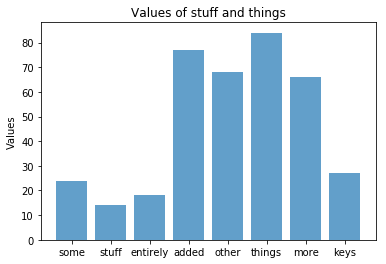

In [6]:
import matplotlib.pyplot as plt
objects = list(x for sublist in all_dicts for x in sublist.keys())
y_pos = range(len(objects))
vals = [x for sublist in all_dicts for x in sublist.values()]


plt.bar(y_pos, vals, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Values')

plt.title('Values of stuff and things')

plt.show()

## Key Uses
- Hands-on walkthroughs of new library modules, visualization techniques and strategies for attacking existing problems 

In [3]:
!ls -al

total 40
drwxr-xr-x  6 brianaustin  staff    192 Oct 23 11:56 .
drwxr-xr-x  4 brianaustin  staff    128 Oct 22 14:09 ..
drwxr-xr-x  3 brianaustin  staff     96 Oct 23 10:48 .ipynb_checkpoints
-rw-r--r--  1 brianaustin  staff    554 Oct 23 11:56 Dockerfile
-rw-r--r--  1 brianaustin  staff  15863 Oct 23 11:36 Jupyter Slides.ipynb
drwxr-xr-x  5 brianaustin  staff    160 Oct 23 11:53 src


**Notice the `src` tree with a module in it -- let's take a look at what's in there**

In [4]:
%%bash
tree src

src
├── __init__.py
├── __pycache__
│   ├── __init__.cpython-36.pyc
│   └── new_module.cpython-36.pyc
└── new_module.py

1 directory, 4 files


In [5]:
%load_ext autoreload
%autoreload 2

from src import new_module

In [7]:
# this function is 
new_module.reverse('reverse me') 

'em esrever'

## Major Drawbacks